## Подгрузим пакеты

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D 

# keras.backend.tensorflow_backend._get_available_gpus()

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


***
## Загрузка и предобработка данных

Загрузка

In [2]:
# load train
train = pd.read_csv('../input/train.csv')
y_train = train.label
train.drop(labels = ["label"], axis = 1, inplace=True)
# load holdout
test = pd.read_csv('../input/test.csv')
f'Given train shape is {train.shape} and holdout test shape is  {test.shape}.'

'Given train shape is (42000, 784) and holdout test shape is  (28000, 784).'

Распределение классов

'With 10 classes.'

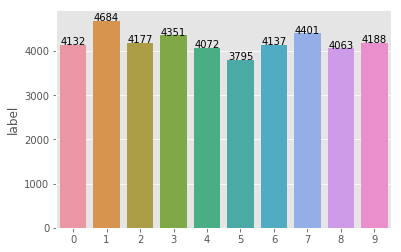

In [3]:
num_classes = np.unique(y_train).shape[0]
display(f'With {num_classes} classes.')

g = sns.barplot(y=y_train.value_counts(sort=False), x=np.unique(y_train))
for class_, value in y_train.value_counts(sort=False).iteritems():
    g.text(x=class_, y=value, s=value, color='black', ha="center")
del g, class_, value

Предобработка

In [4]:
y_train = pd.get_dummies(data=y_train, drop_first=False)

In [5]:
# Unknown diminsions (number of objects), width, heigth, aux_dim
X_train = train.values.reshape(-1, 28, 28
                                 , 1
                                )
X_test = test.values.reshape(-1, 28, 28
                              , 1
                              )
# get target one-hot due to binary from multiclass task 
y_train = pd.get_dummies(data=y_train, drop_first=False)

# normalize from 0 to 1 due to descrease computation complexity
X_train = X_train /  255
X_test = X_test / 255

In [6]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=42)

### Покажем несколько случайных картинок из обучающей выборки

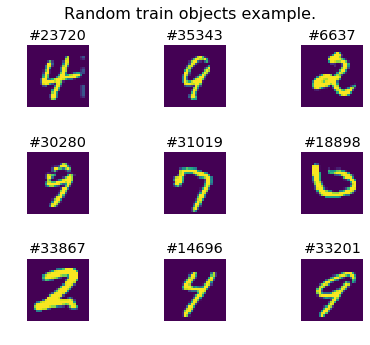

In [7]:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(6, 5))
axes = axes.ravel() 
fig.suptitle("Random train objects example.", fontsize=16)
for i in range(3*3):
    num = np.random.randint(0, X_train.shape[0])
    axes[i].set_title('#' + str(num))
    axes[i].imshow(X_train[num]
                   .reshape(28, 28)
                  )
    axes[i].axis('off')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
del num

***
## Обучим модель

In [8]:
num_epochs = 7
batch_size = 32

model = Sequential()
model.add(Conv2D(64, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5, seed=32))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5, seed=32))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# import tensorflow as tf
# with tf.device('/gpu:-1'):
model.fit(X_train, y_train, 
          validation_split=0.3,
            #validation_data=(X_val, y_val),
            batch_size=batch_size,
            epochs=num_epochs,
            shuffle=True,
            #steps_per_epoch 
            verbose=1)

# import datetime
# pd.to_pickle(pd.DataFrame(model.history.history), f"{datetime.datetime.now()} metrics_history.txt")
# pd.DataFrame(model.history.history).plot()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 29399 samples, validate on 12601 samples
Epoch 1/7
29399/29399 [==============================] - 10s 344us/step - loss: 0.2282 - acc: 0.9309 - val_loss: 0.0660 - val_acc: 0.9795
Epoch 2/7
29399/29399 [==============================] - 6s 217us/step - loss: 0.0948 - acc: 0.9720 - val_loss: 0.0433 - val_acc: 0.9867
Epoch 3/7
29399/29399 [==============================] - 6s 216us/step - loss: 0.0695 - acc: 0.9793 - val_loss: 0.0388 - val_acc: 0.9888
Epoch 4/7
29399/29399 [==============================] - 6s 216us/step - loss: 0.0607 - acc: 0.9816 - val_loss: 0.0432 - val_acc: 0.9870
Epoch 5/7
29399/29399 [==============================] - 6s 215us/step - loss: 0.0541 - acc: 0.9843 - val_loss: 0.0406 - val_acc: 0.9875
Epoch 6/7
29399/29399 [======

Сохраним нашу модель

In [9]:
model.save('my_model.h5')
model.save_weights('my_model_weights.h5')

### Посмотрим на ошибки и на метрики
Проведём эксперимент на валидационной выборки и оценим:
* confusion_matrix
* classification_report

In [10]:
model.fit(X_tr, y_tr, 
        validation_split=0.3,
        #validation_data=(X_val, y_val),
        batch_size=batch_size,
        shuffle=True,
        epochs=num_epochs,
        verbose=1)

Train on 20580 samples, validate on 8820 samples
Epoch 1/7
20580/20580 [==============================] - 4s 191us/step - loss: 0.0478 - acc: 0.9848 - val_loss: 0.0219 - val_acc: 0.9941
Epoch 2/7
20580/20580 [==============================] - 4s 188us/step - loss: 0.0397 - acc: 0.9885 - val_loss: 0.0228 - val_acc: 0.9943
Epoch 3/7
20580/20580 [==============================] - 4s 189us/step - loss: 0.0380 - acc: 0.9878 - val_loss: 0.0227 - val_acc: 0.9942
Epoch 4/7
20580/20580 [==============================] - 4s 189us/step - loss: 0.0286 - acc: 0.9907 - val_loss: 0.0300 - val_acc: 0.9923
Epoch 5/7
20580/20580 [==============================] - 4s 188us/step - loss: 0.0257 - acc: 0.9915 - val_loss: 0.0306 - val_acc: 0.9923
Epoch 6/7
20580/20580 [==============================] - 4s 189us/step - loss: 0.0284 - acc: 0.9911 - val_loss: 0.0298 - val_acc: 0.9924
Epoch 7/7
20580/20580 [==============================] - 4s 188us/step - loss: 0.0227 - acc: 0.9926 - val_loss: 0.0299 - val_acc:

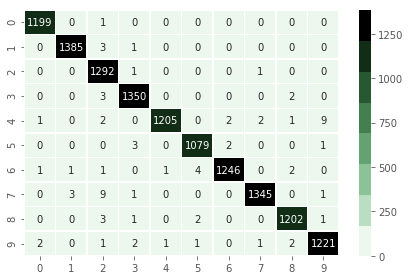

In [11]:
df_cm = pd.DataFrame(confusion_matrix(y_val.values.argmax(axis=-1), model.predict_classes(X_val)), 
                     index = [i for i in y_train.columns.values],
                     columns = [i for i in y_train.columns.values])
palette = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=False)
sns.heatmap(data=df_cm, 
            annot=True, 
            fmt="d", 
            linewidths=.5, 
            cmap=palette)
plt.tight_layout()
del df_cm, palette

In [12]:
print(classification_report(y_val.values.argmax(axis=-1), model.predict_classes(X_val)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1200
           1       1.00      1.00      1.00      1389
           2       0.98      1.00      0.99      1294
           3       0.99      1.00      0.99      1355
           4       1.00      0.99      0.99      1222
           5       0.99      0.99      0.99      1085
           6       1.00      0.99      0.99      1256
           7       1.00      0.99      0.99      1359
           8       0.99      0.99      0.99      1209
           9       0.99      0.99      0.99      1231

   micro avg       0.99      0.99      0.99     12600
   macro avg       0.99      0.99      0.99     12600
weighted avg       0.99      0.99      0.99     12600



Выглядит, как будто модель переобучилась (в этом случае:запомнила все имеющиеся данные). Можно добавить регуляризаций или использовать модель проще.